# **MÓDULO 39 - Exercicio - Aplicando SVM**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros. A mesma que também usamos na tarefa de XGboost!


In [1]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [2]:
#SEU CÓDIGO AQUI

base = pd.read_csv('CARRO_CLIENTES.csv', delimiter=',')
base = base.drop('User ID', axis=1)
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        1000 non-null   object
 1   Age           1000 non-null   int64 
 2   AnnualSalary  1000 non-null   int64 
 3   Purchased     1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [3]:
#SEU CÓDIGO AQUI
base_cod = pd.get_dummies(base,columns=['Gender'], drop_first=True)
base_cod.head(5)

,Age,AnnualSalary,Purchased,Gender_Male
0,35,20000,0,True
1,40,43500,0,True
2,49,74000,0,True
3,40,107500,1,True
4,25,79000,0,True


# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

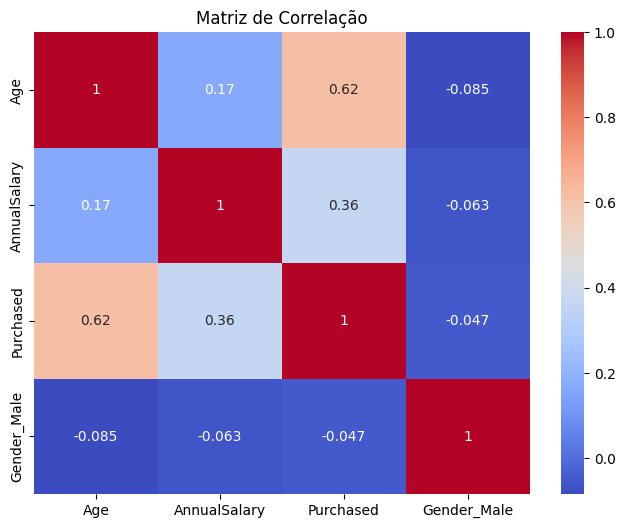

In [4]:
#SEU CÓDIGO AQUI

corr = base_cod.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')  
plt.show()


Aqui observo que Idade e Salário anual tem boa correlação com nosso alvo.

# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [5]:
#SEU CÓDIGO AQUI
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = base_cod.drop('Purchased', axis=1)
y = base_cod['Purchased']
x_scal = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scal, y, test_size=0.2, random_state=1)

**Todos passos até aqui vocês realizaram na tarefa anterior também!**

# 5. Treino o modelo SVM com sua base de treino.
Esse modelo deve ser treinado usando o kernel linear.

In [6]:
#SEU CÓDIGO AQUI
svm_model = SVC(kernel='linear', random_state=1, C=1.0)
svm_model.fit(x_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


# 6. Realize as previsões para a base de teste e traga a avaliação.

In [7]:
#SEU CÓDIGO AQUI

y_pred = svm_model.predict(x_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.84
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.91      0.88       125
           1       0.83      0.72      0.77        75

    accuracy                           0.84       200
   macro avg       0.84      0.82      0.82       200
weighted avg       0.84      0.84      0.84       200



# 7. Treine um novo modelo SVM com sua base de treino + realize as previsões e avalições.
Esse modelo dedve ser treinado usando o kernel poly.

In [8]:
#SEU CÓDIGO AQUI
svm_model_poly = SVC(kernel='poly', degree=3, random_state=1, C=1.0)
svm_model_poly.fit(x_train, y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [9]:
y_pred_poly = svm_model_poly.predict(x_test)
print("Acurácia (Polinomial):", accuracy_score(y_test, y_pred_poly))
print("Relatório de Classificação (Polinomial):\n", classification_report(y_test, y_pred_poly))

Acurácia (Polinomial): 0.88
Relatório de Classificação (Polinomial):
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       125
           1       0.90      0.76      0.83        75

    accuracy                           0.88       200
   macro avg       0.89      0.86      0.87       200
weighted avg       0.88      0.88      0.88       200



# 8. Qual modelo se saiu melhor? O SVM com kernel linear ou poly? Compare também com o XGboost, da atividade anterior, você obteve melhores previsões com qual dos modelos?

Nos modelos SVM, o Kernell poly obteve uma leva melhora, não muito significativa. Já o modelo Xboost possui resultados bem melhores comparando com os modelos SVM. **Modelo Xboost** Acurácia de 0.94 **Modelo SVM** Acurácia de 0.88 